Датасет взят из: https://archive.ics.uci.edu/dataset/222/bank+marketing

- `age` — возраст клиента в годах.
- `job` — профессиональная категория клиента.
- `marital` — семейное положение клиента.
- `education` — уровень образования клиента.
- `default` — наличие у клиента кредитного дефолта.
- `housing` — наличие у клиента жилищного кредита.
- `loan` — наличие у клиента потребительского кредита.
- `contact` — тип канала связи, использованного для контакта с клиентом.
- `month` — месяц, в котором осуществлялся последний контакт.
- `day_of_week` — день недели, в который осуществлялся последний контакт.
- `duration` — длительность последнего контакта с клиентом в секундах.
- `campaign` — количество контактов с клиентом в рамках текущей маркетинговой кампании.
- `pdays` — количество дней, прошедших с момента предыдущего контакта с клиентом в прошлых кампаниях.
- `previous` — количество контактов с клиентом в рамках предыдущих маркетинговых кампаний.
- `poutcome` — результат предыдущей маркетинговой кампании для данного клиента.
- `emp.var.rate` — показатель изменения уровня занятости в экономике.
- `cons.price.idx` — индекс потребительских цен, характеризующий уровень инфляции.
- `cons.conf.idx` — индекс потребительской уверенности.
- `euribor3m` — трёхмесячная межбанковская процентная ставка Euribor.
- `nr.employed` — общее количество занятых в экономике (в тысячах).
- `y` — целевая переменная, отражающая факт положительного отклика клиента на предложение.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("bank-additional-full.csv", sep=";", quotechar='"')

print("Размер:", df.shape)
display(df.head(5))
display(df.tail(5))

Размер: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [49]:
print("Информация:")
print(df.info())

print("Пропущенные значения")
na_cnt = df.isna().sum().sort_values(ascending=False)
print(na_cnt[na_cnt > 0])

print("\nДубликат")
print("duplicate rows:", df.duplicated().sum())

Информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             40858 non-null  category
 2   marital         41108 non-null  category
 3   education       39457 non-null  category
 4   default         32591 non-null  category
 5   housing         40198 non-null  category
 6   loan            40198 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  

# Краткий вывод:

Датасет содержит 41 188 наблюдений и 23 признака, включая числовые и категориальные переменные, при этом типы данных заданы корректно. Пропущенные значения присутствуют только в отдельных категориальных признаках, наибольшее их количество наблюдается в переменной default, тогда как числовые признаки и целевая переменная пропусков не содержат. В данных выявлено незначительное число дубликатов строк, что указывает на в целом хорошее качество исходного датасета для дальнейшего анализа.

- числовые показатели экономики -> float
- счётчики / возраст -> int
- категориальные -> object (пока)

Целевая переменная - y - object, сделаем ее бинарной (0/1)


# `unknown -> NaN`

показывает, в каких столбцах и в каком количестве появились пропуски после замены "unknown" на NaN.

In [65]:
obj_cols = df.select_dtypes(include="object").columns
df[obj_cols] = df[obj_cols].replace("unknown", np.nan)

print("Пропущенные значения после преобразования в NaN")
na_cnt2 = df.isna().sum().sort_values(ascending=False)
print(na_cnt2[na_cnt2 > 0].to_string())

Пропущенные значения после преобразования в NaN
default      8597
education    1731
housing       990
loan          990
job           330
marital        80


После замены значения "unknown" на NaN мы оценили распределение пропусков по признакам.
Наибольшее количество отсутствующих значений наблюдается в признаке default, что может быть связано с нежеланием клиентов раскрывать информацию о кредитных дефолтах.
Данные пропуски учитывались при дальнейшем анализе и проверке гипотез.

# Преобразование целевой переменной

In [66]:
print(df["y"].value_counts())

y
no     36548
yes     4640
Name: count, dtype: int64


In [69]:
df["y_bin"] = df["y"].map({"yes": 1, "no": 0})

print("Пропуски:", df["y_bin"].isna().sum())
print(df[["y", "y_bin"]].head(5))

Пропуски: 0
    y y_bin
0  no     0
1  no     0
2  no     0
3  no     0
4  no     0


In [71]:
cat_cols = [
    "job","marital","education","default","housing","loan",
    "contact","month","day_of_week","poutcome","y"
]

for c in cat_cols:
    df[c] = df[c].astype("category")

num_cols = [
    "age","duration","campaign","pdays","previous",
    "emp.var.rate","cons.price.idx","cons.conf.idx",
    "euribor3m","nr.employed"
]

for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

print(df.dtypes.to_string())

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                 category
y_bin             category
duration_bin      category


На данном этапе были приведены типы данных в соответствие с экономическим и бизнес-смыслом признаков. Категориальные переменные (такие как профессия, семейное положение, уровень образования и характеристики контакта с клиентом) были преобразованы в тип category, что позволяет корректно использовать их при группировках и проверке статистических гипотез. Количественные признаки были приведены к числовым типам, что обеспечивает возможность применения параметрических и непараметрических статистических методов.

В результате данного шага структура датасета была упорядочена, что минимизирует риск ошибок при дальнейшем анализе и создаёт корректную основу для проведения EDA и проверки статистических гипотез.

# Числовые

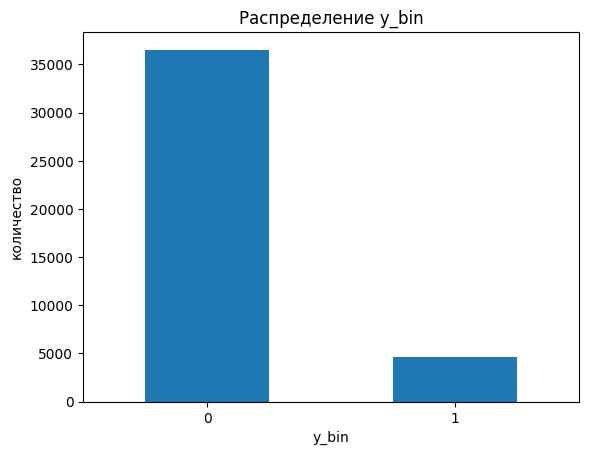

In [10]:
y_counts = df["y_bin"].value_counts(dropna=False).sort_index()

plt.figure()
y_counts.plot(kind="bar")
plt.title("Распределение y_bin")
plt.xlabel("y_bin")
plt.ylabel("количество")
plt.xticks(rotation=0)
plt.show()

Распределение целевой переменной y_bin демонстрирует выраженный дисбаланс классов. Подавляющее большинство наблюдений относится к классу y = 0, тогда как доля положительного исхода y = 1 составляет порядка 10–12% от общего числа наблюдений. Такой дисбаланс является типичным для маркетинговых кампаний, где отклик клиентов на предложение является редким событием.

Наличие дисбаланса классов важно учитывать при дальнейшем анализе, поскольку при большом объёме выборки даже небольшие различия между группами могут быть статистически значимыми, но при этом не иметь существенной практической значимости. В связи с этим в дальнейшем анализе будет уделено внимание не только p-value, но и величине эффекта и интерпретации результатов с точки зрения бизнеса.

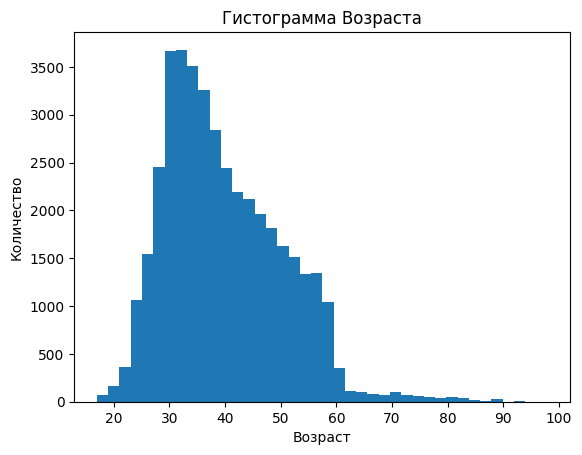

In [11]:
plt.figure()
df["age"].dropna().plot(kind="hist", bins=40)
plt.title(f"Гистограмма Возраста")
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.show()

Распределение возраста клиентов является асимметричным с правым хвостом. Основная масса наблюдений сосредоточена в диапазоне примерно от 25 до 55 лет, с пиком в районе 30–40 лет. При этом наблюдается наличие клиентов старших возрастных групп, что формирует длинный правый хвост распределения.

Полученная форма распределения указывает на отклонение от нормальности, что следует учитывать при дальнейшем анализе и выборе статистических методов.

# Гипотеза 1

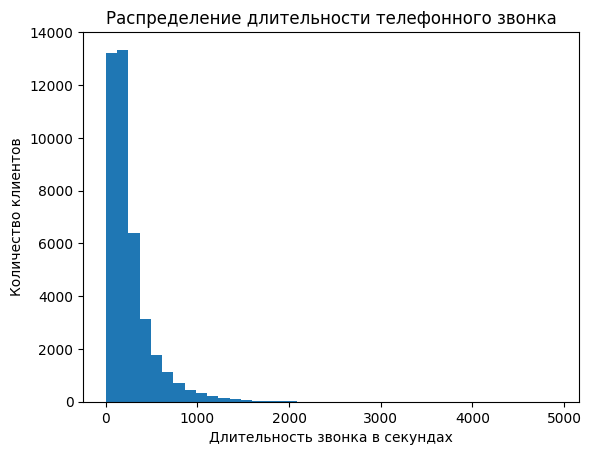

In [12]:
plt.figure()
df["duration"].dropna().plot(kind="hist", bins=40)
plt.title("Распределение длительности телефонного звонка")
plt.xlabel("Длительность звонка в секундах")
plt.ylabel("Количество клиентов")
plt.show()

Распределение длительности телефонного звонка характеризуется выраженной правосторонней асимметрией с длинным правым хвостом. Большинство наблюдений сосредоточено в области коротких звонков, что указывает на то, что в большинстве случаев контакт с клиентом завершается достаточно быстро. При этом в данных присутствуют редкие, но очень длительные разговоры, отражающие случаи высокой вовлечённости клиентов и формирующие длинный хвост распределения. Форма распределения существенно отклоняется от нормальной, что следует учитывать при дальнейшем статистическом анализе и выборе методов проверки гипотез.

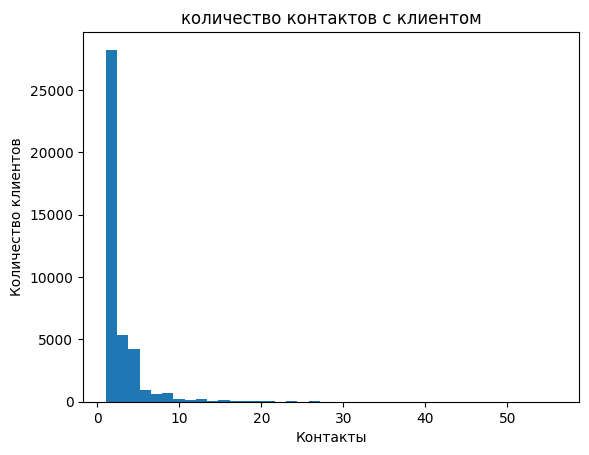

In [13]:
plt.figure()
df["campaign"].dropna().plot(kind="hist", bins=40)
plt.title("количество контактов с клиентом")
plt.xlabel("Контакты")
plt.ylabel("Количество клиентов")
plt.show()

Распределение количества контактов с клиентом в рамках текущей маркетинговой кампании характеризуется выраженной правосторонней асимметрией. Подавляющее большинство клиентов контактировались один–два раза, тогда как повторные обращения встречаются значительно реже. При этом в данных присутствуют отдельные наблюдения с большим числом контактов, формирующие длинный правый хвост распределения. Такая форма распределения указывает на наличие редких, но экстремальных значений и отклонение от нормальности, что необходимо учитывать при дальнейшем статистическом анализе и выборе методов проверки гипотез.

# Гипотеза 2

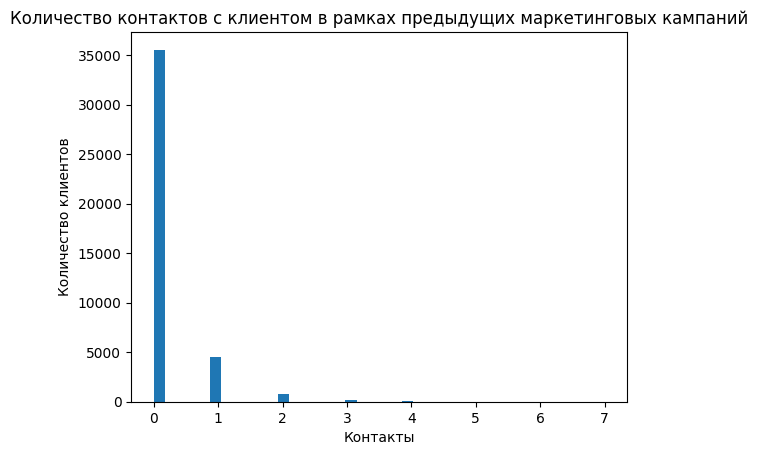

In [72]:
plt.figure()
df["previous"].dropna().plot(kind="hist", bins=40)
plt.title("Количество контактов с клиентом в рамках предыдущих маркетинговых кампаний")
plt.xlabel("Контакты")
plt.ylabel("Количество клиентов")
plt.show()

Распределение количества контактов с клиентом в рамках предыдущих маркетинговых кампаний характеризуется выраженной правосторонней асимметрией. Большинство клиентов не имели предыдущих контактов, тогда как повторные обращения встречаются значительно реже. Наличие клиентов с ненулевым числом прошлых контактов указывает на существование подгруппы с историей взаимодействия, что может быть связано с вероятностью отклика.


# Категориальные

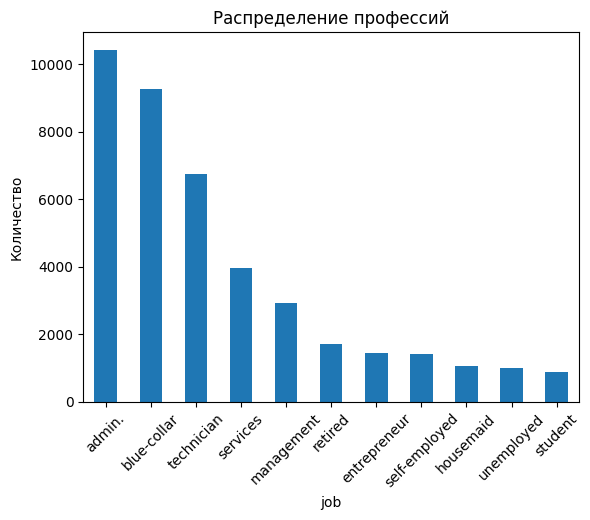

In [46]:
df["job"].value_counts().plot(kind="bar")
plt.title("Распределение профессий")
plt.xlabel("job")
plt.ylabel("Количество")
plt.xticks(rotation=45)
plt.show()

Распределение профессий в датасете является неоднородным: наибольшее число клиентов относится к категориям administrative, blue-collar и technician, которые формируют основную часть выборки. Существенно меньшая доля наблюдений приходится на профессии из сфер услуг и управления, а такие категории, как student, unemployed и housemaid, представлены в данных значительно реже. Наличие выраженно доминирующих и редких категорий важно учитывать при дальнейшем анализе, поскольку малочисленные группы могут давать нестабильные оценки и требовать аккуратной интерпретации при проверке статистических гипотез.

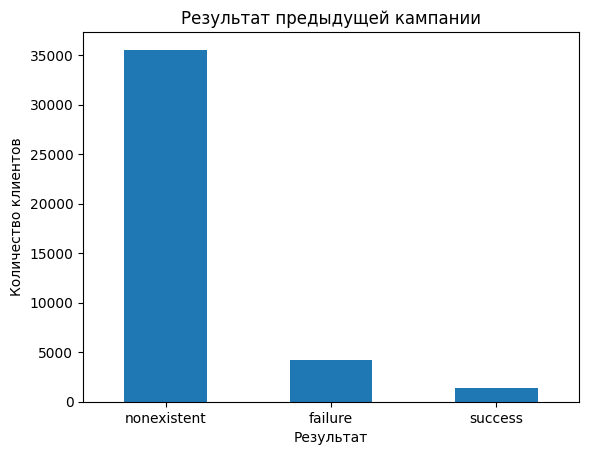

/tmp/ipython-input-353247392.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pout_rate = df.groupby("poutcome")["y_bin"].mean().sort_values(ascending=False)


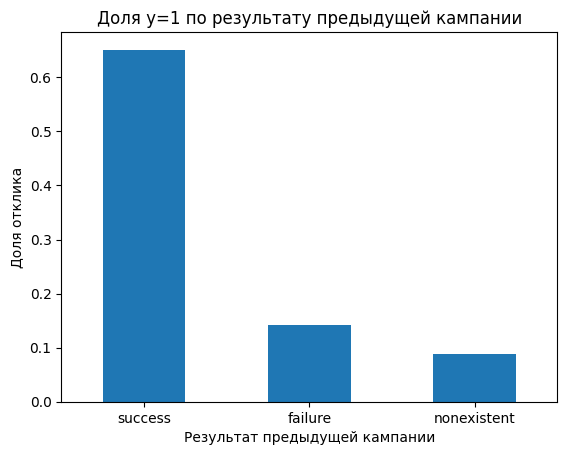

In [43]:
pout_counts = df["poutcome"].value_counts()

plt.figure()
pout_counts.plot(kind="bar")
plt.title("Результат предыдущей кампании")
plt.xlabel("Результат")
plt.ylabel("Количество клиентов")
plt.xticks(rotation=0)
plt.show()

pout_rate = df.groupby("poutcome")["y_bin"].mean().sort_values(ascending=False)

plt.figure()
pout_rate.plot(kind="bar")
plt.title("Доля y=1 по результату предыдущей кампании")
plt.xlabel("Результат предыдущей кампании")
plt.ylabel("Доля отклика")
plt.xticks(rotation=0)
plt.show()

Большинство клиентов не имели предыдущих контактов в рамках прошлых кампаний, однако именно результат такого взаимодействия существенно связан с вероятностью отклика. Клиенты с успешным предыдущим контактом демонстрируют кратно более высокую долю подписки по сравнению с остальными, тогда как отсутствие истории взаимодействия связано с наименьшей вероятностью отклика. Это указывает на сильную связь между результатом предыдущей кампании и решением о подписке на депозит.

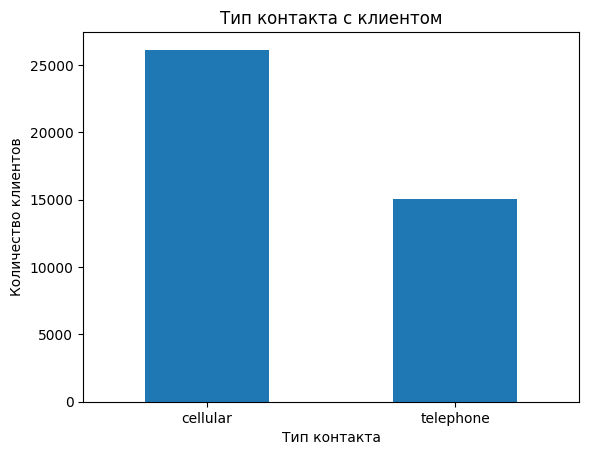

/tmp/ipython-input-2346013107.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contact_rate = df.groupby("contact")["y_bin"].mean().sort_values(ascending=False)


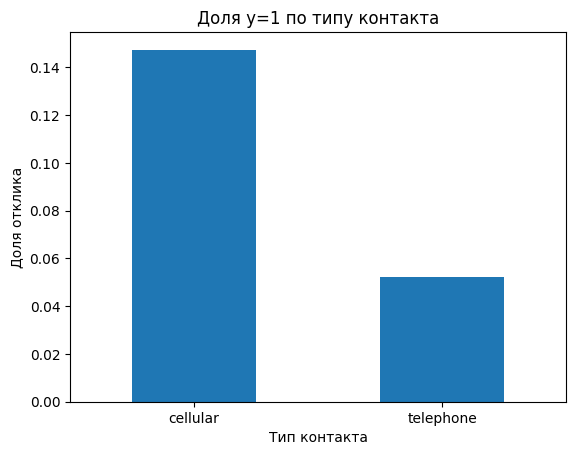

In [42]:
contact_counts = df["contact"].value_counts()

plt.figure()
contact_counts.plot(kind="bar")
plt.title("Тип контакта с клиентом")
plt.xlabel("Тип контакта")
plt.ylabel("Количество клиентов")
plt.xticks(rotation=0)
plt.show()

contact_rate = df.groupby("contact")["y_bin"].mean().sort_values(ascending=False)

plt.figure()
contact_rate.plot(kind="bar")
plt.title("Доля y=1 по типу контакта")
plt.xlabel("Тип контакта")
plt.ylabel("Доля отклика")
plt.xticks(rotation=0)
plt.show()

Контакты через мобильную связь используются чаще, чем через стационарный телефон, и сопровождаются существенно более высокой долей положительного отклика. Это указывает на возможную сильную связь между типом контакта и вероятностью подписки на депозит, что делает данный признак перспективным для дальнейшей статистической проверки.

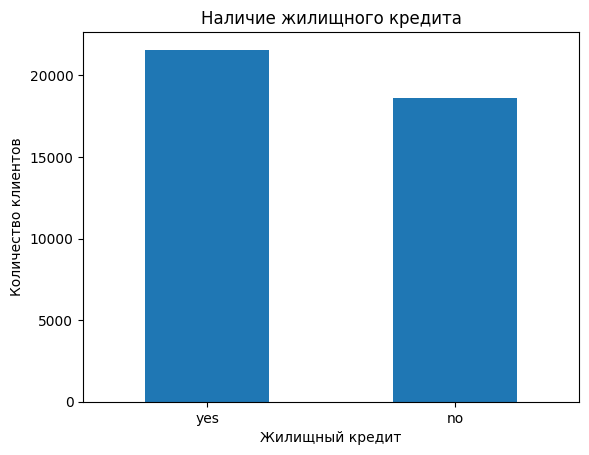

/tmp/ipython-input-730570911.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  housing_rate = df.groupby("housing")["y_bin"].mean().sort_values(ascending=False)


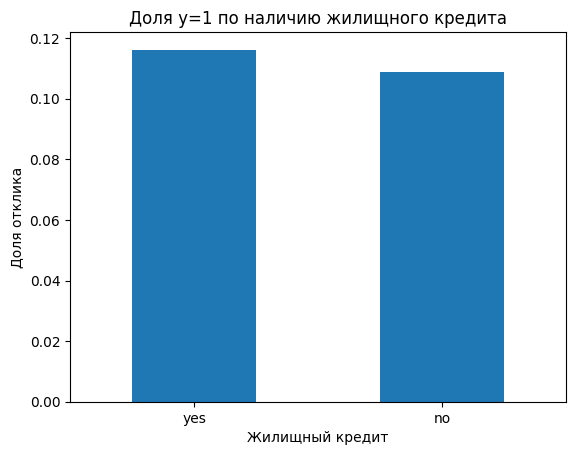

In [41]:
housing_counts = df["housing"].value_counts()

plt.figure()
housing_counts.plot(kind="bar")
plt.title("Наличие жилищного кредита")
plt.xlabel("Жилищный кредит")
plt.ylabel("Количество клиентов")
plt.xticks(rotation=0)
plt.show()

housing_rate = df.groupby("housing")["y_bin"].mean().sort_values(ascending=False)

plt.figure()
housing_rate.plot(kind="bar")
plt.title("Доля y=1 по наличию жилищного кредита")
plt.xlabel("Жилищный кредит")
plt.ylabel("Доля отклика")
plt.xticks(rotation=0)
plt.show()

Клиенты с жилищным кредитом и без него представлены в выборке в сопоставимых количествах. Доля положительного отклика среди клиентов с жилищным кредитом немного выше, однако визуально различия между группами невелики. Это указывает на возможную, но слабую связь между наличием жилищного кредита и решением о подписке на депозит, требующую дальнейшей статистической проверки.


In [24]:
#df.to_csv("bank_clean.csv", index=False)
#from google.colab import files
#files.download("bank_clean.csv")

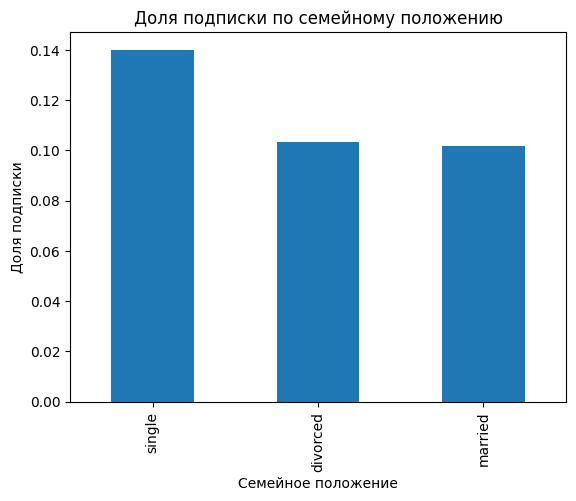

In [25]:
rate = (df.groupby("marital", observed=True)["y_bin"].mean().sort_values(ascending=False))

plt.figure()
rate.plot(kind="bar")
plt.title("Доля подписки по семейному положению")
plt.xlabel("Семейное положение")
plt.ylabel("Доля подписки")
plt.show()

Доля подписки несколько выше среди клиентов без семейных обязательств, однако различия между семейными группами выражены слабо. Это указывает на возможную, но ограниченную связь между семейным положением и вероятностью отклика, требующую аккуратной интерпретации и статистической проверки.


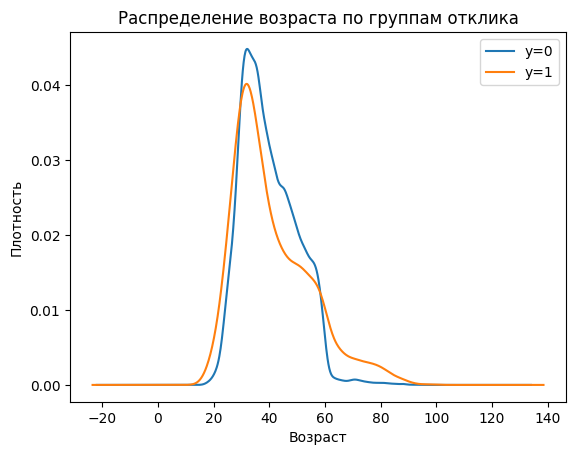

In [27]:
plt.figure()

df.loc[df["y_bin"] == 0, "age"].plot(kind="kde", label="y=0")
df.loc[df["y_bin"] == 1, "age"].plot(kind="kde", label="y=1")

plt.title("Распределение возраста по группам отклика")
plt.xlabel("Возраст")
plt.ylabel("Плотность")
plt.legend()
plt.show()

Распределения возраста для клиентов с откликом и без него существенно перекрываются, что указывает на слабую зависимость вероятности подписки от возраста. Наблюдается лишь небольшое смещение распределения в сторону более старших возрастных групп среди клиентов с положительным откликом.

# Сезонность

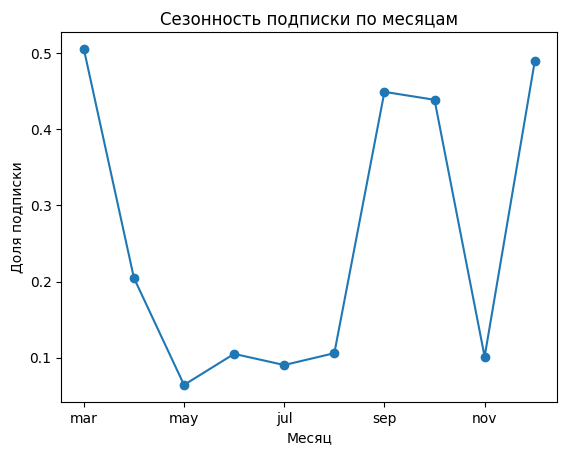

In [45]:
month_rate = (
    df.groupby("month", observed=True)["y_bin"]
    .mean()
    .reindex(["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"])
)

plt.figure()
month_rate.plot(kind="line", marker="o")
plt.title("Сезонность подписки по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Доля подписки")
plt.show()

Наблюдаются выраженные различия в доле подписки по месяцам, что указывает на возможное наличие сезонного эффекта. Вероятность отклика заметно варьируется в течение года, что делает временные признаки потенциально значимыми для дальнейшего анализа и формулировки гипотез.

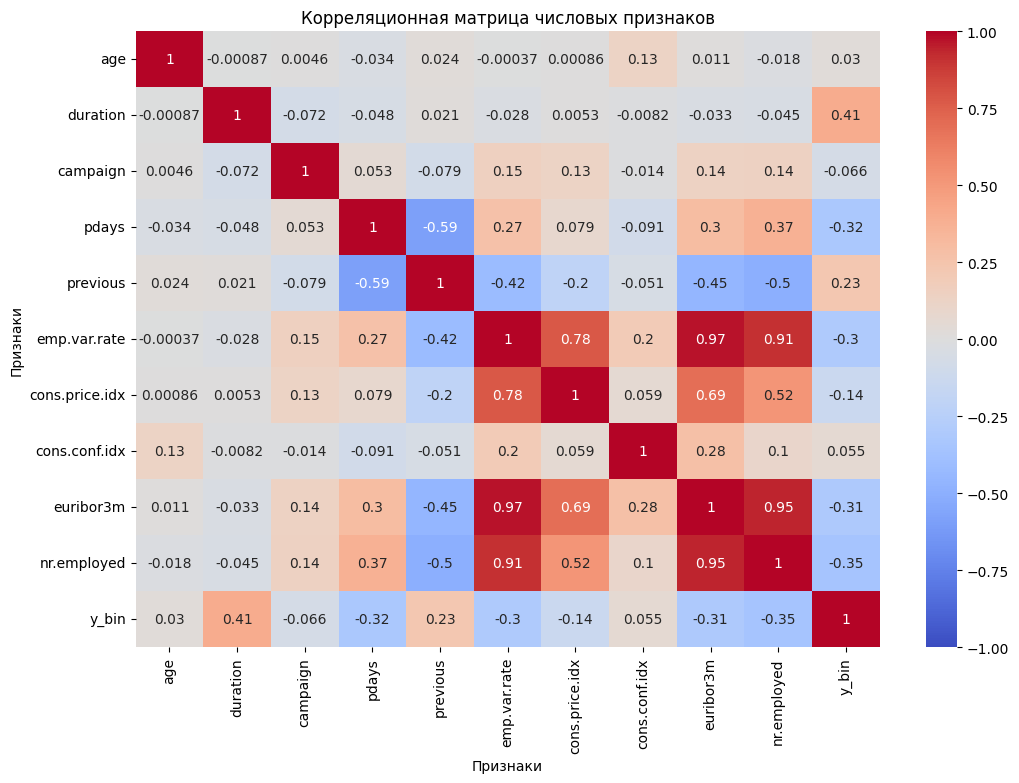

In [32]:
plt.figure(figsize=(12, 8))

corr_matrix = df[num_cols + ['y_bin']].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1
)

plt.title("Корреляционная матрица числовых признаков")
plt.xlabel("Признаки")
plt.ylabel("Признаки")
plt.show()

Корреляционный анализ показывает, что наибольшая линейная связь с целевой переменной наблюдается у признака duration. Среди остальных факторов умеренную связь с откликом демонстрируют pdays и previous, а также макроэкономические показатели, связь которых с целевой переменной носит отрицательный характер. Большинство числовых признаков имеют слабую линейную зависимость с y_bin.

# Гипотеза 2

/tmp/ipython-input-3354976493.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("education")["y_bin"]


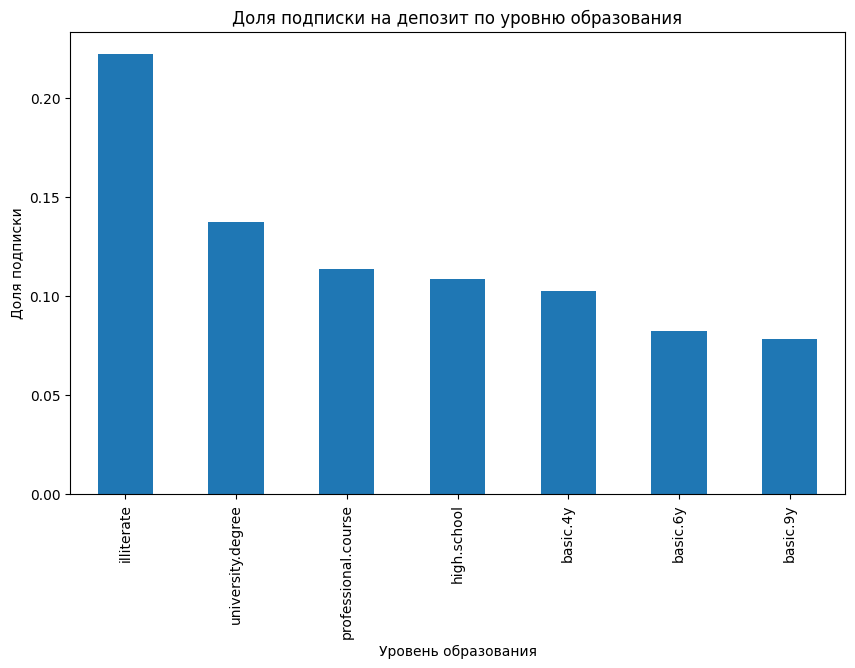

In [39]:
edu_rate = (
    df
    .groupby("education")["y_bin"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
edu_rate.plot(kind="bar")

plt.title("Доля подписки на депозит по уровню образования")
plt.xlabel("Уровень образования")
plt.ylabel("Доля подписки")

plt.show()

# Описание

На графике представлена доля клиентов, оформивших депозит, в зависимости от уровня образования.

# Наблюдение

Наблюдаются различия в доле подписки между уровнями образования. Наиболее высокая доля отклика наблюдается у клиентов без формального образования (illiterate) и с университетским образованием, тогда как среди клиентов с базовым образованием доля подписки ниже.

# Интерпретация

Полученные различия могут указывать на возможную связь между уровнем образования и решением о подписке на депозит.

# Гипотеза

H0: уровень образования не связан с решением о подписке на депозит

H1: уровень образования связан с решением о подписке на депозит


# Гипотеза 2

/tmp/ipython-input-2423857591.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby("job")["y_bin"].mean().sort_values(ascending=False)


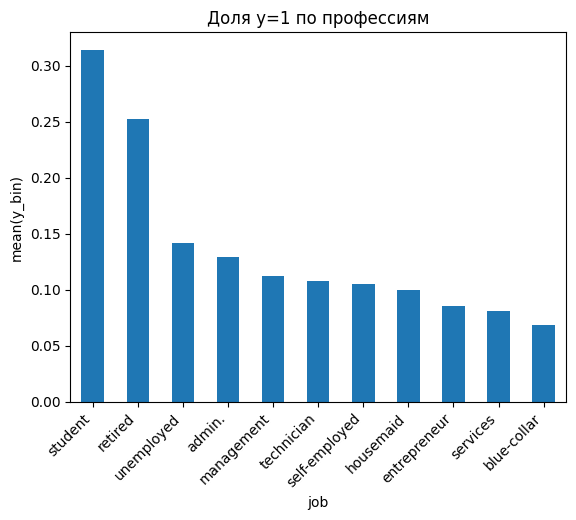

In [17]:
rate = df.groupby("job")["y_bin"].mean().sort_values(ascending=False)

rate.plot(kind="bar")
plt.title("Доля y=1 по профессиям")
plt.xlabel("job")
plt.ylabel("mean(y_bin)")
plt.xticks(rotation=45, ha="right")
plt.show()

# Описание

На графике представлена доля клиентов, оформивших депозит (y = 1), в зависимости от профессиональной категории.

# Наблюдение

Наблюдаются заметные различия в уровне отклика между профессиями. Наиболее высокая доля подписки характерна для студентов и пенсионеров, тогда как среди представителей рабочих профессий и сферы услуг доля подписки ниже. Для большинства профессиональных категорий уровень отклика находится в диапазоне от 8% до 14%.

# Интерпретация
Полученные различия указывают на возможную связь между профессиональной принадлежностью клиента и решением о подписке на депозит, что позволяет сформулировать статистическую гипотезу о наличии зависимости между данными признаками.

# Гипотеза
H0: Профессия НЕ связана с решением о подписке на депозит

H1: Профессия связана с решением о подписке на депозит

# Вывод:

В ходе разведочного анализа данных были изучены распределения ключевых признаков и их взаимосвязь с целевой переменной. Выявлен выраженный дисбаланс классов, что требует осторожной интерпретации статистических результатов. Визуальный анализ показал, что вероятность отклика заметно различается в зависимости от характеристик предыдущего взаимодействия с клиентом, типа контакта и отдельных социально-демографических признаков, тогда как влияние возраста и ряда финансовых показателей выражено слабо. Также выявлена сильная взаимная корреляция между макроэкономическими показателями, указывающая на потенциальную мультиколлинеарность. Полученные наблюдения послужили основанием для формулировки и последующей статистической проверки гипотез.